In [1]:
import simulations as sim
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
test = sim.interface.main('/Users/cameronflannery/Documents/git/cmflannery/simulations/simulations/test_config.cfg')

In [3]:
altitude, velocity, acceleration, mass, time, thrust, drag = test.run()

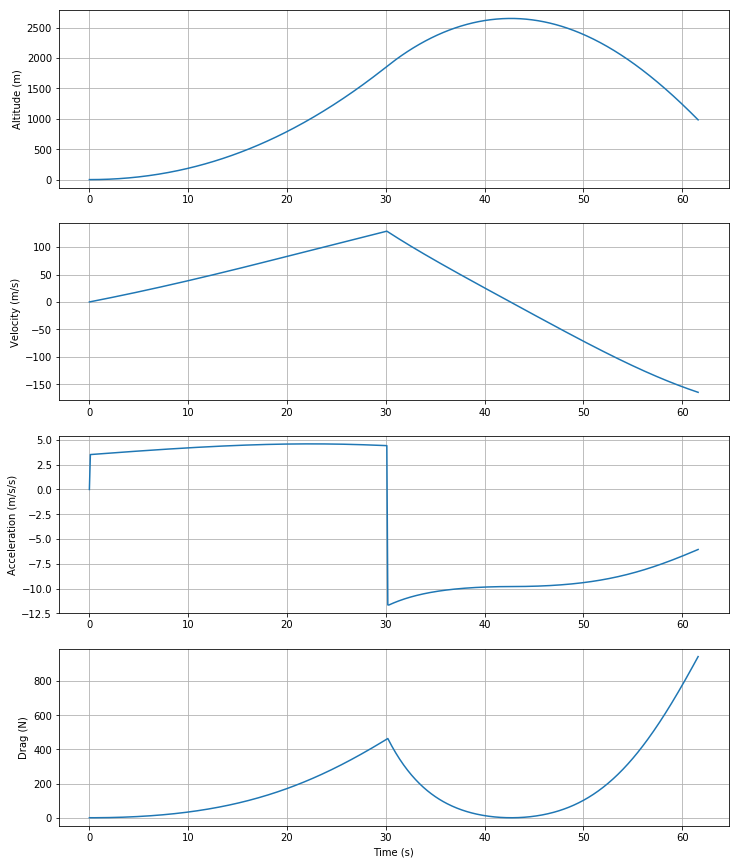

In [4]:
# reload(sim)
# altitude, velocity, acceleration, mass, time, thrust, drag = sim.test_Rocket()
fig, ax = plt.subplots(4,1, figsize=( 12,15))
ax[0].plot(time, altitude)
ax[0].set_ylabel('Altitude (m)')

for i in range(0,4):
    ax[i].grid()
ax[1].plot(time, velocity)
ax[1].set_ylabel('Velocity (m/s)')
ax[2].plot(time, acceleration)
ax[2].set_ylabel('Acceleration (m/s/s)')
ax[3].plot(time, drag)
ax[3].set_ylabel('Drag (N)')
ax[3].set_xlabel('Time (s)')

plt.show()